In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [8]:
# import stock data

def get_data(stocks, start, end):
    stockData = yf.download(stocks,start,end)
    stockData= stockData["Close"]
    returns = stockData.pct_change()
    mean_returns = returns.mean()
    covMatrix = returns.cov()
    return mean_returns,covMatrix

In [9]:
stock_list = ["TSLA","META","AMZN","NVDA","MSFT","GOOGL","AAPL"]
stocks = [stock for stock in stock_list]
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=300)
mean_returns, cov_matrix = get_data(stocks, start_date, end_date)

[*********************100%***********************]  7 of 7 completed


In [12]:
weights = np.random.random(len(mean_returns))
weights /= np.sum(weights)
print(weights)

[0.0351649  0.10487084 0.29026692 0.03401433 0.21258043 0.05941455
 0.26368803]


# Monte Carlo Simulation

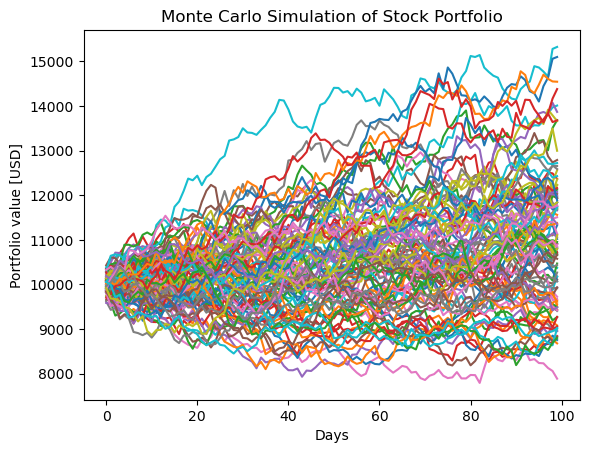

In [21]:
mc_sims = 100
T= 100

mean_matrix = np.full(shape =(T, len(weights)),fill_value = mean_returns)
mean_matrix = mean_matrix.T

portfolio_sims = np.full(shape=(T, mc_sims),fill_value=0.0)
initial_portfolio = 10000
for m in range(0,mc_sims):
    # MC loops
    Z = np.random.normal(size = (T,len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    daily_returns = mean_matrix + np.inner(L,Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights,daily_returns.T)+1)*initial_portfolio
    
plt.plot(portfolio_sims)
plt.ylabel("Portfolio value [USD]")
plt.xlabel("Days")
plt.title("Monte Carlo Simulation of Stock Portfolio")
plt.show()